# [Aditya Rajesh]
# Programming Exercise \#2
---

# Preamble

In [26]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
/var/folders/jc/ls3v0yk16xx0_4jnbd8m2x_w0000gn/T/ipykernel_15624/3524984580.py:4: SyntaxWarning: invalid escape sequence '\ '
  '''


"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [27]:
# import relevant Python libraries
import numpy as np
import pandas as pd
from scipy import stats as sps
from scipy.stats import gmean, hmean, kurtosis, skew
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
### Your import commands go here ###

# **1. Feature Engineering for _Environmental Sensor Telemetry Data_**

## Problem 1.1

In [28]:
###
enviorment_sensor_data = pd.read_csv('iot_telemetry_dataset.csv')
###

### (a)

_[This seems to look like an unsupervised task from the looks of the dataset. This is because there is target that is explicitly labeled. There seems to be no lablelled column where we woul classify the enviorments in some sort of way, so this definitely feels to me like it is a unsupervised task..]_

### (b)

In [29]:
### 
num_samples = enviorment_sensor_data.shape[0]
print(f"Number of data samples in the dataset: {num_samples}")
###

Number of data samples in the dataset: 405184


### (c)



In [30]:
### 
mac_address = '00:0f:00:70:91:0a'
num_samples_mac = enviorment_sensor_data[enviorment_sensor_data['device'] == mac_address].shape[0]
print(f"Number of samples for device {mac_address}: {num_samples_mac}")
###

Number of samples for device 00:0f:00:70:91:0a: 111815



### (d)

In [31]:
### 
ac_address = '1c:bf:ce:15:ec:4d'
num_samples_mac = enviorment_sensor_data[enviorment_sensor_data['device'] == mac_address].shape[0]
print(f"Number of samples for device {mac_address}: {num_samples_mac}")
###

Number of samples for device 00:0f:00:70:91:0a: 111815


### (e)

In [32]:
###
mac_address = 'b8:27:eb:bf:9d:51'
num_samples_mac = enviorment_sensor_data[enviorment_sensor_data['device'] == mac_address].shape[0]
print(f"Number of samples for device {mac_address}: {num_samples_mac}")
###

Number of samples for device b8:27:eb:bf:9d:51: 187451


## Problem 1.2

### (a)

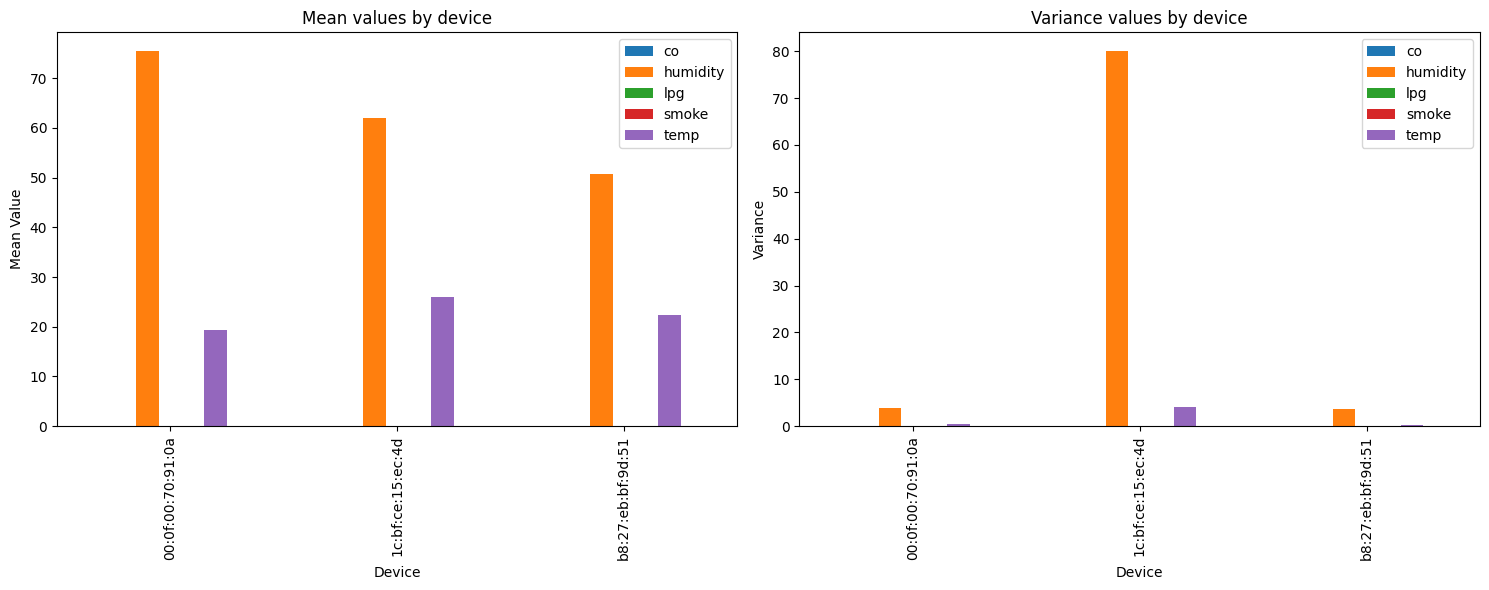

In [33]:
### 
means = enviorment_sensor_data.groupby('device')[['co', 'humidity', 'lpg', 'smoke', 'temp']].mean()
variances = enviorment_sensor_data.groupby('device')[['co', 'humidity', 'lpg', 'smoke', 'temp']].var()
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
means.plot(kind='bar', ax=ax[0], title='Mean values by device', ylabel='Mean Value', xlabel='Device')
ax[0].legend(loc='upper right')
variances.plot(kind='bar', ax=ax[1], title='Variance values by device', ylabel='Variance', xlabel='Device')
ax[1].legend(loc='upper right')
plt.tight_layout()
plt.show()
###

_[My observations are that the humidity has the highest mean pretty much across all the devices. The temperature shows more variance across devices, which could mean that the conditions are different between the devices in a pretty significant way. The smoke and lpg have pretty small means and variances across the devices. This could mean that the gas levels and smoke concentration are stable.]_

### (b)

In [34]:
###
columns_to_standardize = ['co', 'humidity', 'lpg', 'smoke', 'temp']
def standardize(group):
    return (group - group.mean()) / group.std()
enviorment_sensor_data[columns_to_standardize] = enviorment_sensor_data.groupby('device')[columns_to_standardize].transform(standardize)
print(enviorment_sensor_data.head())
###

             ts             device        co  humidity  light       lpg  \
0  1.594512e+09  b8:27:eb:bf:9d:51 -1.080793  0.098428  False -1.093491   
1  1.594512e+09  00:0f:00:70:91:0a -0.464451  0.281222  False -0.458333   
2  1.594512e+09  b8:27:eb:bf:9d:51 -1.044864  0.045488  False -1.056107   
3  1.594512e+09  1c:bf:ce:15:ec:4d  0.687051  1.664629   True  0.696248   
4  1.594512e+09  b8:27:eb:bf:9d:51 -1.060344  0.045488  False -1.072209   

   motion     smoke      temp  
0   False -1.091260  0.871610  
1   False -0.460392  0.524162  
2   False -1.054137  0.664099  
3   False  0.694633  0.480890  
4   False -1.070127  0.664099  



### (c)

In [35]:
###
encoded_data = pd.get_dummies(enviorment_sensor_data, columns=['device', 'light', 'motion'])
print(encoded_data.head())
###

             ts        co  humidity       lpg     smoke      temp  \
0  1.594512e+09 -1.080793  0.098428 -1.093491 -1.091260  0.871610   
1  1.594512e+09 -0.464451  0.281222 -0.458333 -0.460392  0.524162   
2  1.594512e+09 -1.044864  0.045488 -1.056107 -1.054137  0.664099   
3  1.594512e+09  0.687051  1.664629  0.696248  0.694633  0.480890   
4  1.594512e+09 -1.060344  0.045488 -1.072209 -1.070127  0.664099   

   device_00:0f:00:70:91:0a  device_1c:bf:ce:15:ec:4d  \
0                     False                     False   
1                      True                     False   
2                     False                     False   
3                     False                      True   
4                     False                     False   

   device_b8:27:eb:bf:9d:51  light_False  light_True  motion_False  \
0                      True         True       False          True   
1                     False         True       False          True   
2                      True     

### (d)

In [36]:
###
print(encoded_data.head(20))
###

              ts        co  humidity       lpg     smoke      temp  \
0   1.594512e+09 -1.080793  0.098428 -1.093491 -1.091260  0.871610   
1   1.594512e+09 -0.464451  0.281222 -0.458333 -0.460392  0.524162   
2   1.594512e+09 -1.044864  0.045488 -1.056107 -1.054137  0.664099   
3   1.594512e+09  0.687051  1.664629  0.696248  0.694633  0.480890   
4   1.594512e+09 -1.060344  0.045488 -1.072209 -1.070127  0.664099   
5   1.594512e+09  0.649527  1.787605  0.659043  0.657370  0.480890   
6   1.594512e+09 -1.044841  0.045488 -1.056083 -1.054113  0.664099   
7   1.594512e+09 -0.398156  0.281222 -0.383561 -0.387058  0.524162   
8   1.594512e+09  0.507419  1.787605  0.517887  0.516039  0.480890   
9   1.594512e+09 -1.055167  0.045488 -1.066824 -1.064779  0.664099   
10  1.594512e+09 -1.073150  0.045488 -1.085536 -1.083360  0.664099   
11  1.594512e+09  0.624684  1.798784  0.634395  0.632686  0.480890   
12  1.594512e+09 -1.052681  0.045488 -1.064237 -1.062210  0.664099   
13  1.594512e+09  0.

### (e)

_[It has not been touched because it does not carry any direct signifcance, whether it be numerical or categorical, for the machine learning algorithm to do anything. This data in that column was simply the timestamp for when the data was collected, and doesn't really have any significane to it apart from just logging the time the data was taken.]_

## Problem 1.3

In [37]:
### 
columns = ['co', 'humidity', 'lpg', 'smoke', 'temp']
enviorment_sensor_data['mean'] = enviorment_sensor_data[columns].mean(axis=1)
enviorment_sensor_data['geometric_mean'] = gmean(np.abs(enviorment_sensor_data[columns]), axis=1)
enviorment_sensor_data['harmonic_mean'] = hmean(np.abs(enviorment_sensor_data[columns]), axis=1)
enviorment_sensor_data['variance'] = enviorment_sensor_data[columns].var(axis=1)
enviorment_sensor_data['kurtosis'] = kurtosis(enviorment_sensor_data[columns], axis=1)
enviorment_sensor_data['skewness'] = skew(enviorment_sensor_data[columns], axis=1)
print(enviorment_sensor_data[['mean', 'geometric_mean', 'harmonic_mean', 'variance', 'kurtosis', 'skewness']].head(40))
###

        mean  geometric_mean  harmonic_mean  variance  kurtosis  skewness
0  -0.459101        0.643851       0.355540  0.817552 -1.268521  0.673607
1  -0.115558        0.428502       0.417687  0.231202 -1.626008  0.504156
2  -0.489104        0.511869       0.189809  0.641322 -1.365727  0.626984
3   0.844690        0.767316       0.713105  0.218513  0.083334  1.347752
4  -0.498619        0.516485       0.190115  0.654782 -1.374738  0.622674
5   0.846887        0.752883       0.692806  0.282264  0.157954  1.420887
6  -0.489090        0.511862       0.189809  0.641303 -1.365713  0.626990
7  -0.072678        0.387290       0.379765  0.195721 -1.589427  0.520788
8   0.761968        0.650609       0.589734  0.328947  0.246717  1.497492
9  -0.495437        0.514944       0.190014  0.650264 -1.371752  0.624102
10 -0.506492        0.520285       0.190362  0.666034 -1.382010  0.619199
11  0.834288        0.736625       0.676308  0.294919  0.183826  1.444486
12 -0.493908        0.514203       0.1

# **2. Empirical Risk Minimization and the Law of Large Numbers**

## Problem 2.1

### (a)

In [38]:
###
die_faces = [1, 2, 3, 4, 5, 6]
n_values = np.arange(1, 10001)
empirical_averages = []
for n in n_values:
    rolls = np.random.choice(die_faces, size=n)
    empirical_average = np.mean(rolls)
    empirical_averages.append(empirical_average)
print(empirical_averages)
###

[np.float64(3.0), np.float64(5.0), np.float64(4.333333333333333), np.float64(3.0), np.float64(5.0), np.float64(3.8333333333333335), np.float64(2.857142857142857), np.float64(3.375), np.float64(2.888888888888889), np.float64(2.3), np.float64(3.8181818181818183), np.float64(3.8333333333333335), np.float64(4.0), np.float64(2.7142857142857144), np.float64(3.2), np.float64(3.5625), np.float64(3.411764705882353), np.float64(3.7222222222222223), np.float64(2.8947368421052633), np.float64(3.8), np.float64(3.4761904761904763), np.float64(3.8636363636363638), np.float64(2.9130434782608696), np.float64(3.3333333333333335), np.float64(3.48), np.float64(3.6538461538461537), np.float64(4.0), np.float64(4.285714285714286), np.float64(3.4827586206896552), np.float64(3.2333333333333334), np.float64(3.870967741935484), np.float64(3.1875), np.float64(3.515151515151515), np.float64(3.235294117647059), np.float64(3.0), np.float64(3.861111111111111), np.float64(3.4054054054054053), np.float64(3.157894736842

### (b)

In [39]:
### 
expected_value = 3.5
absolute_discrepancies = [abs(empirical_avg - expected_value) for empirical_avg in empirical_averages]
print(absolute_discrepancies)
###

[np.float64(0.5), np.float64(1.5), np.float64(0.833333333333333), np.float64(0.5), np.float64(1.5), np.float64(0.3333333333333335), np.float64(0.6428571428571428), np.float64(0.125), np.float64(0.6111111111111112), np.float64(1.2000000000000002), np.float64(0.31818181818181834), np.float64(0.3333333333333335), np.float64(0.5), np.float64(0.7857142857142856), np.float64(0.2999999999999998), np.float64(0.0625), np.float64(0.08823529411764719), np.float64(0.22222222222222232), np.float64(0.6052631578947367), np.float64(0.2999999999999998), np.float64(0.023809523809523725), np.float64(0.36363636363636376), np.float64(0.5869565217391304), np.float64(0.16666666666666652), np.float64(0.020000000000000018), np.float64(0.15384615384615374), np.float64(0.5), np.float64(0.7857142857142856), np.float64(0.01724137931034475), np.float64(0.2666666666666666), np.float64(0.370967741935484), np.float64(0.3125), np.float64(0.015151515151515138), np.float64(0.2647058823529411), np.float64(0.5), np.float64

### (c)



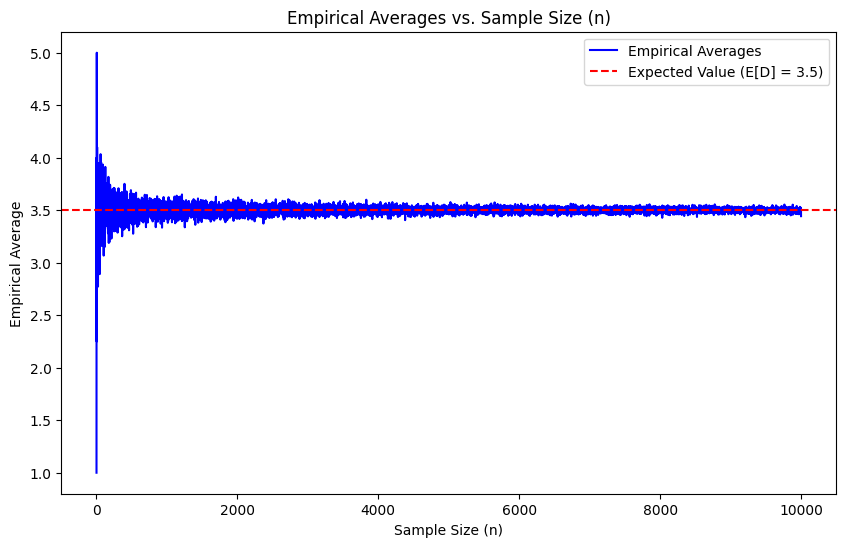

In [20]:
### 
plt.figure(figsize=(10, 6))
plt.plot(n_values, empirical_averages, label='Empirical Averages', color='blue')
plt.axhline(y=3.5, color='red', linestyle='--', label='Expected Value (E[D] = 3.5)')
plt.xlabel('Sample Size (n)')
plt.ylabel('Empirical Average')
plt.title('Empirical Averages vs. Sample Size (n)')
plt.legend()
plt.show()
###

_[Looking at the graph, we can see the empirical average fluctuates significantly when the sample size is small. This shows the random nature of individual die rolls. In these early stages, the empirical average can stray far from the expected value of 3.5. However, as our sample size increases, the empirical average begins to stabilize and converge towards the expected value, with the fluctuations less and less as we go up. By the time the sample size reaches higher values, the empirical average hovers closely around 3.5. This proves that with larger datasets, randomness has less influence, leading to more reliable estimates. This convergence behavior demonstrates how increasing the sample size improves the accuracy of estimates.]_

### (d)

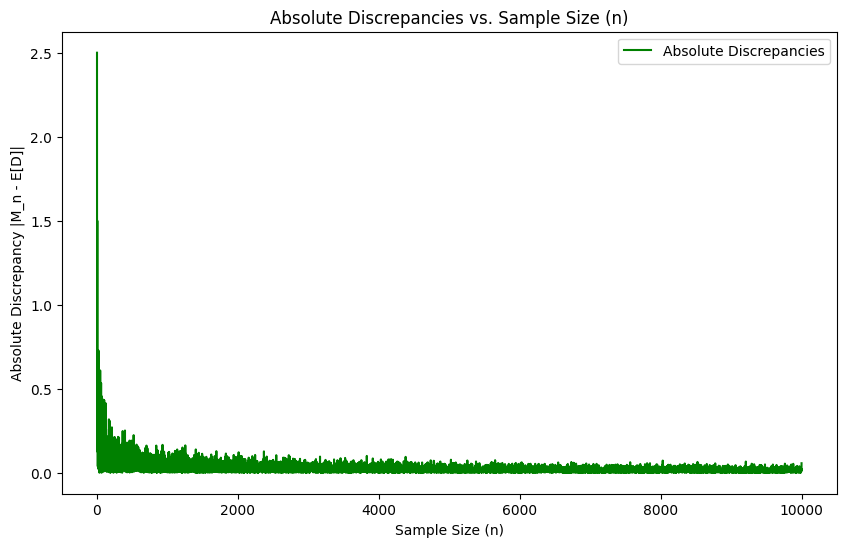

In [21]:
### 
plt.figure(figsize=(10, 6))
plt.plot(n_values, absolute_discrepancies, color='green', label='Absolute Discrepancies')
plt.xlabel('Sample Size (n)')
plt.ylabel('Absolute Discrepancy |M_n - E[D]|')
plt.title('Absolute Discrepancies vs. Sample Size (n)')
plt.legend()
plt.show()
###

_[Basically, as n increases the discrepancies rapidly decrease and basically go down near 0. This behavior aligns with what we know about the Law of Large Numbers, which talks about how the number of trials going up means the sample average will converge to the expected value.]_

## Problem 2.2

### (a)

In [22]:
###
die_faces = [1, 2, 3, 4, 5, 6]
probabilities = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]
n_values = np.arange(1, 10001)
empirical_averages_unfair = []
for n in n_values:
    rolls = np.random.choice(die_faces, size=n, p=probabilities)
    empirical_average = np.mean(rolls)
    empirical_averages_unfair.append(empirical_average)
print(empirical_averages_unfair)
###

[np.float64(5.0), np.float64(4.0), np.float64(4.333333333333333), np.float64(2.75), np.float64(4.2), np.float64(4.5), np.float64(5.571428571428571), np.float64(3.75), np.float64(3.888888888888889), np.float64(4.5), np.float64(4.545454545454546), np.float64(4.5), np.float64(4.461538461538462), np.float64(3.7857142857142856), np.float64(4.066666666666666), np.float64(4.4375), np.float64(4.294117647058823), np.float64(4.777777777777778), np.float64(4.421052631578948), np.float64(4.75), np.float64(4.619047619047619), np.float64(4.7272727272727275), np.float64(4.608695652173913), np.float64(4.583333333333333), np.float64(4.48), np.float64(4.1923076923076925), np.float64(5.0), np.float64(4.714285714285714), np.float64(4.551724137931035), np.float64(5.133333333333334), np.float64(4.612903225806452), np.float64(4.1875), np.float64(4.424242424242424), np.float64(4.852941176470588), np.float64(4.6), np.float64(4.611111111111111), np.float64(4.756756756756757), np.float64(4.157894736842105), np.f

### (b)

In [23]:
### 
expected_value_unfair = sum([face * prob for face, prob in zip(die_faces, probabilities)])
absolute_discrepancies_unfair = [abs(empirical_avg - expected_value_unfair) for empirical_avg in empirical_averages_unfair]
print(absolute_discrepancies_unfair)
###

[np.float64(0.5), np.float64(0.5), np.float64(0.16666666666666696), np.float64(1.75), np.float64(0.2999999999999998), np.float64(0.0), np.float64(1.0714285714285712), np.float64(0.75), np.float64(0.6111111111111112), np.float64(0.0), np.float64(0.04545454545454586), np.float64(0.0), np.float64(0.038461538461538325), np.float64(0.7142857142857144), np.float64(0.43333333333333357), np.float64(0.0625), np.float64(0.20588235294117663), np.float64(0.2777777777777777), np.float64(0.07894736842105221), np.float64(0.25), np.float64(0.11904761904761862), np.float64(0.22727272727272751), np.float64(0.10869565217391308), np.float64(0.08333333333333304), np.float64(0.019999999999999574), np.float64(0.3076923076923075), np.float64(0.5), np.float64(0.2142857142857144), np.float64(0.0517241379310347), np.float64(0.6333333333333337), np.float64(0.11290322580645196), np.float64(0.3125), np.float64(0.07575757575757613), np.float64(0.35294117647058787), np.float64(0.09999999999999964), np.float64(0.11111

### (c)

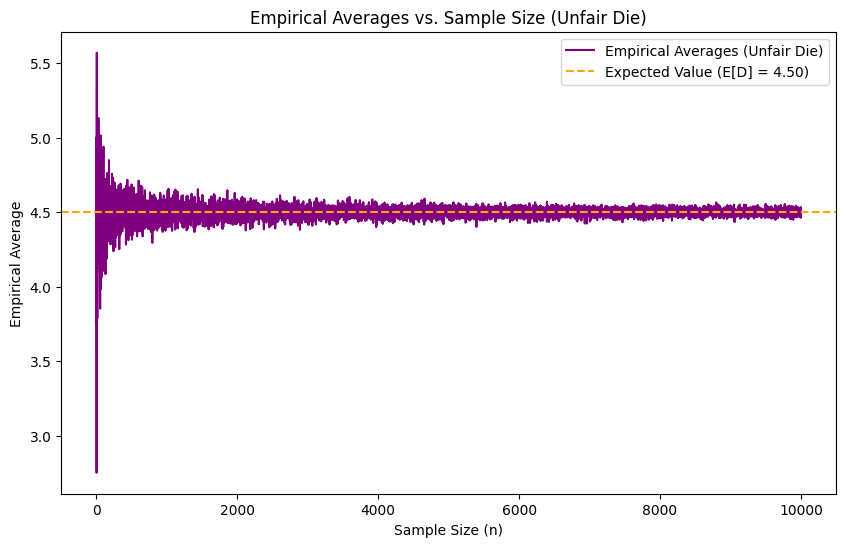

In [24]:
###
plt.figure(figsize=(10, 6))
plt.plot(n_values, empirical_averages_unfair, label='Empirical Averages (Unfair Die)', color='purple')
plt.axhline(y=expected_value_unfair, color='orange', linestyle='--', label=f'Expected Value (E[D] = {expected_value_unfair:.2f})')
plt.xlabel('Sample Size (n)')
plt.ylabel('Empirical Average')
plt.title('Empirical Averages vs. Sample Size (Unfair Die)')
plt.legend()
plt.show()
###

_[We can see that when the sample size n is small, there is a lot of flunctuation in the emperical avergae, but as we increase the sample size, he emperical average stablizies at 4.5, This follows with the Law of Large Numbers. Compared to the fair die, the probability of rolling a 6 is higher which is why the emperical average is higher too. However, even when the die is biased, it still shows that large datasets lead to consisent results with accurate estimates of the expected outcome.]_

### (d)

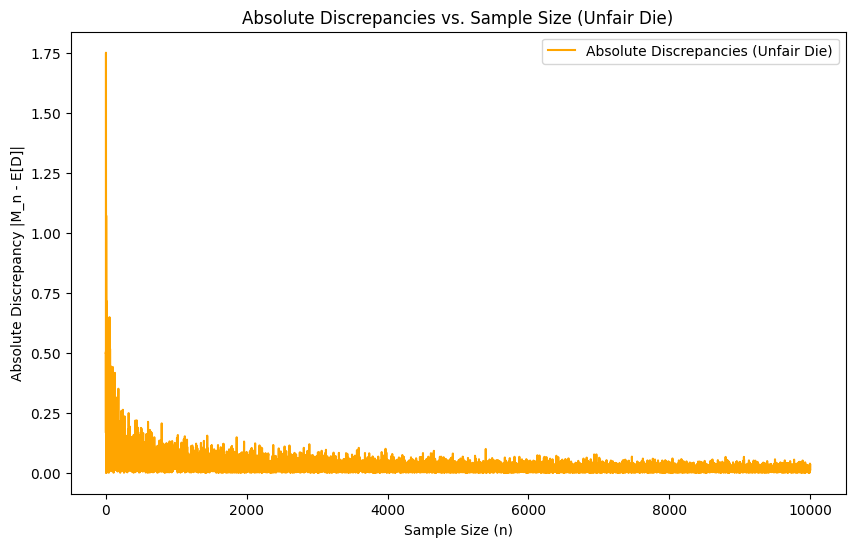

In [25]:
### 
plt.figure(figsize=(10, 6))
plt.plot(n_values, absolute_discrepancies_unfair, color='orange', label='Absolute Discrepancies (Unfair Die)')
plt.xlabel('Sample Size (n)')
plt.ylabel('Absolute Discrepancy |M_n - E[D]|')
plt.title('Absolute Discrepancies vs. Sample Size (Unfair Die)')
plt.legend()
plt.show()
###

_[Similar to the fair die, we have less and less discrepancies as n grows larger and larger which aligns with the Law of Large Numbers. As the number of trials increased, the emperical average approaches the  expected value. Because the die is unfair, the descrepancies early on are larger but as the number of trials grows, the decrepancies decrease basically to 0. This shows that even with biased data, if the sample size is large enough, we'll still get an accurate estimate of the expected outcome.]_